In [1]:
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ( 
    accuracy_score, 
    classification_report, 
    ConfusionMatrixDisplay
)
import tensorflow as tf
logger = logging.getLogger()
logger.setLevel(logging.ERROR)


2025-03-11 03:37:58.608611: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-11 03:37:58.918520: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-11 03:37:59.325802: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741664279.758548   73320 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741664279.816366   73320 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-11 03:38:00.479344: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/'
url += 'NLP-project-tutorial/main/url_spam.csv'
df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2999 non-null   object
 1   is_spam  2999 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 26.5+ KB


In [3]:
df_raw.sample(10, random_state=2025)

,url,is_spam
1897,https://briefingday.com/fan,True
98,https://seattle.eater.com/2020/6/18/21293916/s...,False
141,https://www.buzzfeednews.com/article/tanyachen...,False
2128,https://www.nytimes.com/2020/06/29/movies/sund...,False
2953,http://gettheelevator.com/editorial,True
2537,https://www.theverge.com/2020/6/29/21304947/re...,False
1801,https://www.earios.net/,False
1024,https://old.reddit.com/r/AskReddit/comments/he...,False
37,https://www.theobservereffect.org/marc.html,False
4,https://briefingday.com/fan,True


In [4]:
df_baking = df_raw.copy()
df_baking = df_baking.drop_duplicates()
df_baking['text'] = (
    df_baking['url']
    .str.replace('://',' ')
    .str.replace('.',' ')
    .str.replace('/',' ')
    .str.replace('-',' ')
)
df_baking = df_baking.reset_index(drop=True)
df = df_baking.copy()
df

,url,is_spam,text
0,https://briefingday.us8.list-manage.com/unsubs...,True,https briefingday us8 list manage com unsubscribe
1,https://www.hvper.com/,True,https www hvper com
2,https://briefingday.com/m/v4n3i4f3,True,https briefingday com m v4n3i4f3
3,https://briefingday.com/n/20200618/m#commentform,False,https briefingday com n 20200618 m#commentform
4,https://briefingday.com/fan,True,https briefingday com fan
...,...,...,...
2364,https://www.theverge.com/2020/6/29/21306889/di...,False,https www theverge com 2020 6 29 21306889 disn...
2365,https://www.smartcitiesworld.net/news/news/dee...,False,https www smartcitiesworld net news news deepf...
2366,https://techcrunch.com/2019/07/04/an-optimisti...,False,https techcrunch com 2019 07 04 an optimistic ...
2367,https://www.technologyreview.com/2019/12/20/13...,False,https www technologyreview com 2019 12 20 1314...


In [5]:
df_train, df_test = train_test_split(
    df,
    test_size=0.2,
    stratify= df['is_spam'],
    random_state=2025
)
df_train, df_val = train_test_split(
    df_train,
    test_size=0.2,
    stratify= df_train['is_spam'],
    random_state=2025
)
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_train.shape, df_val.shape, df_test.shape

((1516, 3), (379, 3), (474, 3))

In [6]:
df_train.describe().T

,count,unique,top,freq
url,1516,1516,https://www.spiked-online.com/2020/06/17/a-hea...,1
is_spam,1516,2,False,1360
text,1516,1516,https www spiked online com 2020 06 17 a healt...,1


In [7]:
(
    df_train['text']
    .str.split(expand=True)
    .stack()
    .value_counts()[:20]
)

https          1495
com            1293
www             972
2020            515
06              341
the             235
html            185
news            176
to              150
us              144
coronavirus     112
of              101
org              92
article          86
in               74
youtube          67
and              67
a                66
morningbrew      65
on               65
Name: count, dtype: int64

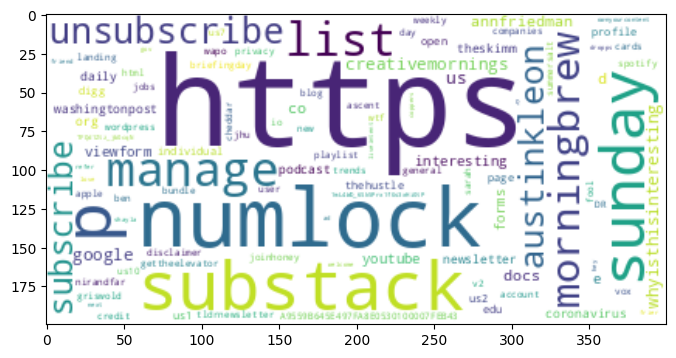

In [8]:
wordcloud = WordCloud(
    max_words=100,
    background_color='White',
    collocations=False,
).generate(' '.join(df_train[df_train['is_spam']]['text']))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

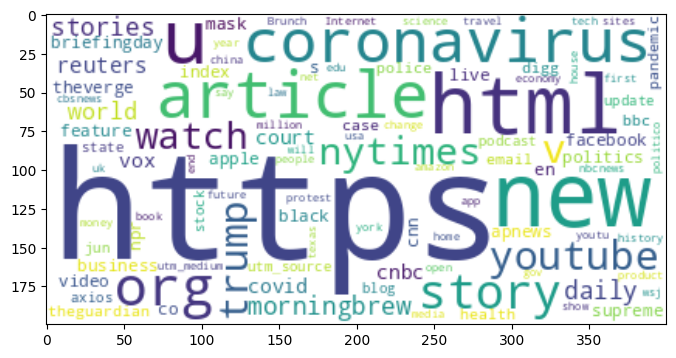

In [9]:
wordcloud = WordCloud(
    max_words=100,
    background_color='White',
    collocations=False,
).generate(' '.join(df_train[~df_train['is_spam']]['text']))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [10]:
X_train = df_train['text']
y_train = df_train['is_spam']
X_val = df_val['text']
y_val = df_val['is_spam']
X_test = df_test['text']
y_test = df_test['is_spam']

In [11]:
vectorizer = TfidfVectorizer(max_features=3000,ngram_range=(1,2))
X_train_v = vectorizer.fit_transform(X_train).toarray()
X_val_v = vectorizer.transform(X_val).toarray()
X_test_v = vectorizer.transform(X_test).toarray()

In [12]:
X_train_v.shape

(1516, 3000)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256,activation='relu',input_shape=(X_train_v.shape[1],)),
    tf.keras.layers.Dense(128,activation='relu'),
    #tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

/workspaces/4geeks_class/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-11 03:38:20.085577: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       768,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801,281 (3.06 MB)

 Trainable params: 801,281 (3.06 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [15]:
history = model.fit(
    X_train_v,
    y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_val_v,y_val)
)

Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8853 - loss: 0.4329 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8971 - val_loss: 0.2138 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9243 - loss: 0.1544 - precision: 0.8645 - recall: 0.2760 - val_accuracy: 0.9340 - val_loss: 0.1948 - val_precision: 0.8889 - val_recall: 0.4103
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9739 - loss: 0.0879 - precision: 0.8996 - recall: 0.8630 - val_accuracy: 0.9472 - val_loss: 0.1921 - val_precision: 0.9130 - val_recall: 0.5385
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9780 - loss: 0.0648 - precision: 0.8930 - recall: 0.9135 - val_accuracy: 0.9314 - val_loss: 0.2045 - val_precision: 0.7241 - val_recall: 0.5385
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9843 - loss: 0.0504 - precision: 0.9439 - recall: 0.9159 - val_accuracy: 0.9393 - val_l

In [16]:
model.evaluate(X_test_v,y_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9484 - loss: 0.3385 - precision: 0.8174 - recall: 0.6387 


[0.3959829807281494,
 0.9409282803535461,
 0.7837837934494019,
 0.5918367505073547]

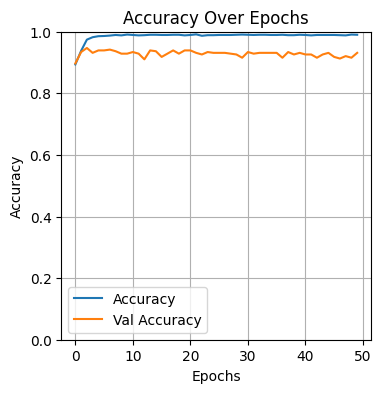

In [17]:
plt.figure(figsize=(4,4))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend()
plt.grid()
plt.show()